In [373]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu,ranksums
import os
import statsmodels.stats.multitest as st
from collections import Counter

In [374]:
with open('cancer_genes.txt') as f:
    cancer_genes = f.read().splitlines()

In [375]:
hypoxia_scores = pd.read_csv('hypoxia_results.txt',sep='\t')
hypoxia_scores.rename(columns = {'variable':'Sample Name'},inplace=True)
hypoxia_samples = hypoxia_scores['Sample Name'].unique()

mutations = pd.read_csv('GTEx_Analysis_2017-06-05_v8_RNA_MuTect_Yizhak19_RNA_MuTect_GTEx_V7_calls_full_table.txt',sep='\t')
relevant_mutations = ['Missense_Mutation','Nonsense_Mutation','Splice_Site', 'Nonstop_Mutation','Start_Codon_SNP']
mutations = mutations[mutations['Variant Classification'].isin(relevant_mutations)]
mutations.fillna(0,inplace=True)
mutations['Sample Name'] = mutations['Sample Name'].apply(lambda x:x.replace('-','.'))
mutations = mutations[mutations['Sample Name'].isin(hypoxia_samples)]

In [376]:
mutation_samples = list(mutations['Sample Name'].unique())

In [377]:
cancer_samples = list(mutations[mutations['Hugo Symbol'].isin(cancer_genes)]['Sample Name'].unique())

In [378]:
other_mutation_samples = list(set(mutation_samples) - set(cancer_samples))

In [379]:
no_mutation_samples = list(set(hypoxia_samples) - set(mutation_samples))

In [380]:
xcell_eso = pd.read_csv('xcell_data/XCell_Esophagus.txt',sep='\t')
xcell_skin = pd.read_csv('xcell_data/XCell_Skin.txt',sep='\t')

#renaming 
xcell_eso.rename(columns={"SAMP":"Sample Name"},inplace=True)
xcell_skin.rename(columns={"SAMP":"Sample Name"},inplace=True)

In [381]:
eso_samples = list(xcell_eso['Sample Name'].unique())
skin_samples = list(xcell_skin['Sample Name'].unique())

In [382]:
#group1
eso_cancer_samples = list(set(eso_samples) & set(cancer_samples))

#group2
eso_other_samples = list(set(eso_samples) & set(other_mutation_samples))

#group3
eso_nomut_samples = list(set(eso_samples) & set(no_mutation_samples))

In [383]:
#group1
skin_cancer_samples = list(set(skin_samples) & set(cancer_samples))

#group2
skin_other_samples = list(set(skin_samples) & set(other_mutation_samples))

#group3
skin_nomut_samples = list(set(skin_samples) & set(no_mutation_samples))

In [384]:
def eso_choose_group(sample):
    if sample in eso_cancer_samples:
        return 'Mutations in Cancer Genes'
    if sample in eso_other_samples:
        return 'Mutations in Other Genes'
    if sample in eso_nomut_samples:
        return 'No Mutations'

In [385]:
def skin_choose_group(sample):
    if sample in skin_cancer_samples:
        return 'Mutations in Cancer Genes'
    if sample in skin_other_samples:
        return 'Mutations in Other Genes'
    if sample in skin_nomut_samples:
        return 'No Mutations'

In [386]:
eso_hypoxia_scores = hypoxia_scores.copy()
eso_hypoxia_scores = eso_hypoxia_scores[eso_hypoxia_scores['Sample Name'].isin(eso_samples)]

In [387]:
skin_hypoxia_scores = hypoxia_scores.copy()
skin_hypoxia_scores = skin_hypoxia_scores[skin_hypoxia_scores['Sample Name'].isin(skin_samples)]

eso_hypoxia_scores['Group'] = eso_hypoxia_scores['Sample Name'].apply(lambda x:eso_choose_group(x))
skin_hypoxia_scores['Group'] = skin_hypoxia_scores['Sample Name'].apply(lambda x:skin_choose_group(x))

In [388]:
Counter(skin_hypoxia_scores['Group'])

Counter({'Mutations in Cancer Genes': 81,
         'Mutations in Other Genes': 175,
         'No Mutations': 256})

In [389]:
Counter(eso_hypoxia_scores['Group'])

Counter({'Mutations in Other Genes': 169,
         'No Mutations': 375,
         'Mutations in Cancer Genes': 56})

In [390]:
eso_hypoxia_scores.sort_values('Group',inplace=True)
skin_hypoxia_scores.sort_values('Group',inplace=True)

In [404]:
def create_boxplots(df):
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout(pad=10.0)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")


    sns.boxplot(ax=axes[0],x='Group',y='ragnum.hyp.score',data=df)
    sns.swarmplot(ax=axes[0],x='Group',y='ragnum.hyp.score',data=df,color='0.25')
    
    sns.boxplot(ax=axes[1],x='Group',y='buffa.hyp.score',data=df)
    sns.swarmplot(ax=axes[1],x='Group',y='buffa.hyp.score',data=df,color='0.25')
    
    #plt.savefig('{0}.pdf'.format(tissue)) 

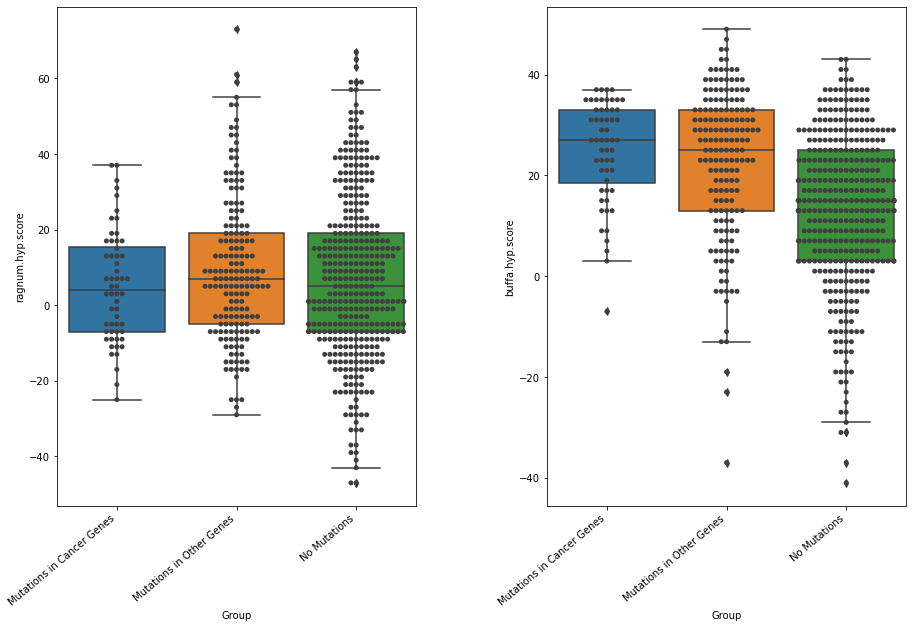

In [405]:
create_boxplots(eso_hypoxia_scores)

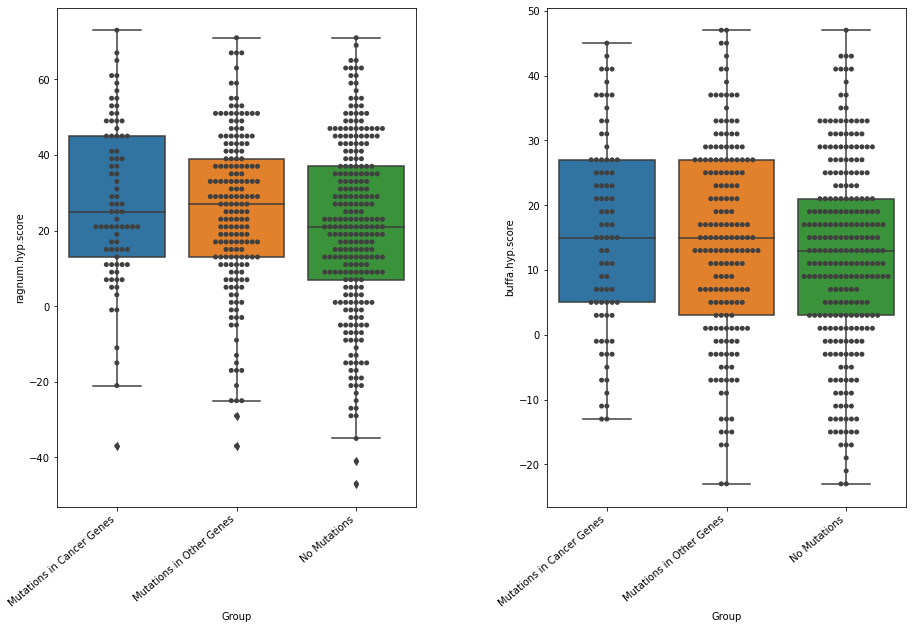

In [407]:
create_boxplots(skin_hypoxia_scores)

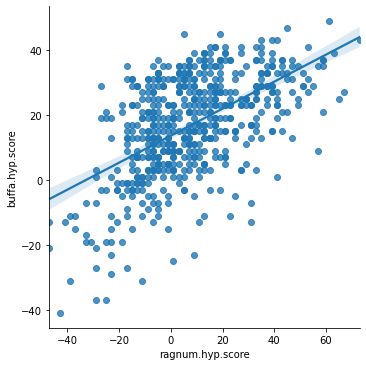

In [394]:
sns.lmplot(x='ragnum.hyp.score',y='buffa.hyp.score',data=eso_hypoxia_scores)

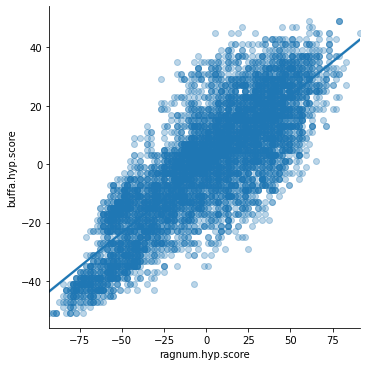

In [395]:
sns.lmplot(x='ragnum.hyp.score',y='buffa.hyp.score',data=hypoxia_scores,scatter_kws={'alpha':0.3})

# M1/M2 Ratio

In [396]:
xcell_eso

aDC  Adipocytes    Astrocytes       B-cells     Basophils  \
0    2.751299e-01    0.055756  6.553750e-18  5.121855e-02  9.746518e-02   
1    1.046391e-01    0.025537  0.000000e+00  0.000000e+00  4.123502e-01   
2    0.000000e+00    0.090816  3.907407e-17  0.000000e+00  4.417977e-01   
3    2.063923e-02    0.016619  2.686145e-17  8.747875e-02  5.518833e-01   
4    0.000000e+00    0.138958  4.032554e-17  6.489954e-19  1.833846e-18   
..            ...         ...           ...           ...           ...   
595  2.176441e-17    0.078622  0.000000e+00  5.995722e-04  4.531355e-01   
596  8.277731e-02    0.053336  0.000000e+00  2.460994e-18  6.570405e-01   
597  7.278230e-02    0.047411  8.125130e-18  1.077927e-01  2.870357e-01   
598  4.503061e-18    0.035471  1.213989e-17  0.000000e+00  2.010896e-01   
599  1.087320e-01    0.034875  0.000000e+00  7.062314e-03  8.506668e-02   

     CD4+ memory T-cells  CD4+ naive T-cells  CD4+ T-cells      CD4+ Tcm  \
0           4.340516e-03        2.271432e-03  0.000000e+00  3.499979e-18   
1           0.000000e+00        1.285577e-17  0.000000e+00  0.000000e+00   
2           2.746024e-18        4.748048e-18  0.000000e+00  3.975775e-17   
3           1.439391e-02        0.000000e+00  1.306985e-17  5.719391e-02   
4           2.544297e-04        5.993293e-18  0.000000e+00  1.335563e-17   
..                   ...                 ...           ...           ...   
595         1.410218e-19        4.207678e-18  4.134209e-18  7.425811e-19   
596         7.052050e-04        0.000000e+00  0.000000e+00  0.000000e+00   
597         5.500242e-19        2.118664e-18  0.000000e+00  9.909528e-18   
598         8.644424e-19        4.419638e-02  5.072674e-17  0.000000e+00   
599         0.000000e+00        7.152049e-03  6.143584e-18  0.000000e+00   

         CD4+ Tem  ...  Skeletal muscle  Smooth muscle     Tgd cells  \
0    3.889921e-17  ...     2.286491e-02       0.619949  0.000000e+00   
1    0.000000e+00  ...     9.359528e-02       0.283301  1.946645e-17   
2    1.439115e-17  ...     9.315002e-02       0.448005  3.605662e-17   
3    8.016661e-19  ...     3.890082e-03       0.729782  6.216073e-17   
4    4.573130e-02  ...     1.140161e-01       0.261108  0.000000e+00   
..            ...  ...              ...            ...           ...   
595  0.000000e+00  ...     1.340978e-01       0.342461  1.197592e-17   
596  4.049843e-18  ...     0.000000e+00       0.332488  0.000000e+00   
597  0.000000e+00  ...     5.662499e-02       0.308157  4.311532e-17   
598  9.529312e-18  ...     2.877999e-02       0.339457  1.601299e-16   
599  2.950999e-17  ...     1.254906e-17       0.413175  8.349011e-17   

        Th1 cells  Th2 cells         Tregs  ImmuneScore  StromaScore  \
0    7.191873e-02   0.138135  2.494355e-01     0.157414     0.039030   
1    5.942398e-17   0.334733  7.920998e-02     0.046963     0.053125   
2    0.000000e+00   0.479953  1.698456e-17     0.023965     0.054467   
3    1.333524e-17   0.638396  1.547600e-19     0.157451     0.024379   
4    1.612525e-01   0.219975  7.258504e-02     0.066694     0.143812   
..            ...        ...           ...          ...          ...   
595  1.413953e-01   0.313221  0.000000e+00     0.148545     0.051607   
596  2.471276e-01   0.069546  0.000000e+00     0.057254     0.078475   
597  4.489912e-17   0.813466  5.613426e-02     0.328247     0.032319   
598  7.698966e-02   0.358570  2.120140e-02     0.216566     0.077209   
599  3.025292e-01   0.163576  3.384263e-02     0.160812     0.034521   

     MicroenvironmentScore               Sample Name  
0                 0.196443  GTEX.111CU.0626.SM.5EGHL  
1                 0.100088  GTEX.111CU.0726.SM.5GZYD  
2                 0.078433  GTEX.111CU.0826.SM.5EGIJ  
3                 0.181831  GTEX.111YS.0826.SM.5GZYK  
4                 0.210506  GTEX.111YS.0926.SM.5EGGI  
..                     ...                       ...  
595               0.200153   GTEX.ZYY3.1626.SM.5EGJF  
596               0.135729   G

In [397]:
xcell_eso['Group'] = xcell_eso['Sample Name'].apply(lambda x:eso_choose_group(x))
xcell_skin['Group'] = xcell_skin['Sample Name'].apply(lambda x:skin_choose_group(x))

In [398]:
xcell_eso.sort_values('Group',inplace=True)
xcell_skin.sort_values('Group',inplace=True)

In [399]:
xcell_eso.columns

Index(['aDC', 'Adipocytes', 'Astrocytes', 'B-cells', 'Basophils',
       'CD4+ memory T-cells', 'CD4+ naive T-cells', 'CD4+ T-cells', 'CD4+ Tcm',
       'CD4+ Tem', 'CD8+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm',
       'CD8+ Tem', 'cDC', 'Chondrocytes', 'Class-switched memory B-cells',
       'CLP', 'CMP', 'DC', 'Endothelial cells', 'Eosinophils',
       'Epithelial cells', 'Erythrocytes', 'Fibroblasts', 'GMP', 'Hepatocytes',
       'HSC', 'iDC', 'Keratinocytes', 'ly Endothelial cells', 'Macrophages',
       'Macrophages M1', 'Macrophages M2', 'Mast cells', 'Megakaryocytes',
       'Melanocytes', 'Memory B-cells', 'MEP', 'Mesangial cells', 'Monocytes',
       'MPP', 'MSC', 'mv Endothelial cells', 'Myocytes', 'naive B-cells',
       'Neurons', 'Neutrophils', 'NK cells', 'NKT', 'Osteoblast', 'pDC',
       'Pericytes', 'Plasma cells', 'Platelets', 'Preadipocytes',
       'pro B-cells', 'Sebocytes', 'Skeletal muscle', 'Smooth muscle',
       'Tgd cells', 'Th1 cells', 'Th2 cells', 'Tregs

In [400]:
xcell_eso['M1/M2 Ratio'] = xcell_eso['Macrophages M1']/xcell_eso['Macrophages M2']

In [401]:
xcell_skin['M1/M2 Ratio'] = xcell_skin['Macrophages M1']/xcell_skin['Macrophages M2']

<AxesSubplot:xlabel='Group', ylabel='M1/M2 Ratio'>

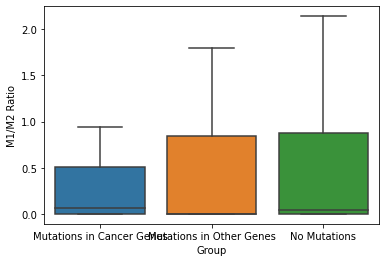

In [409]:
sns.boxplot(x='Group',y='M1/M2 Ratio',data=xcell_eso,showfliers=False)

<AxesSubplot:xlabel='Group', ylabel='M1/M2 Ratio'>

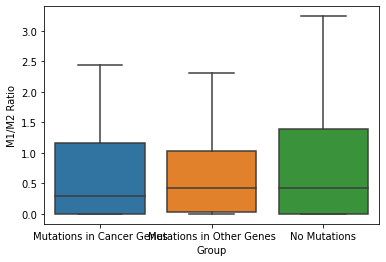

In [403]:
sns.boxplot(x='Group',y='M1/M2 Ratio',data=xcell_skin,showfliers=False)